<a href="https://colab.research.google.com/github/HebaAhmedDahab/Projects-/blob/main/Region_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This Data is about sales over the world 

In [55]:
#importing the library that i need 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from google.colab import files
#from google.colab import auth
#auth.authenticate_user() 
#import gspread 
#from google.auth import default 
#creds, _ = default() 
#from gspread_dataframe import set_with_dataframe

In [56]:
#reading the csv file and showing the head of it
sales = pd.read_csv('/content/1000 Sales Records.csv')
sales.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,10/18/2014,686800706,10/31/2014,8446,437.20,263.33,3692591.20,2224085.18,1468506.02
1,North America,Canada,Vegetables,Online,M,11/7/2011,185941302,12/8/2011,3018,154.06,90.93,464953.08,274426.74,190526.34
2,Middle East and North Africa,Libya,Baby Food,Offline,C,10/31/2016,246222341,12/9/2016,1517,255.28,159.42,387259.76,241840.14,145419.62
3,Asia,Japan,Cereal,Offline,C,4/10/2010,161442649,5/12/2010,3322,205.70,117.11,683335.40,389039.42,294295.98
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,8/16/2011,645713555,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45


In [57]:
sales['Region'].value_counts()

Europe                               267
Sub-Saharan Africa                   262
Middle East and North Africa         138
Asia                                 136
Central America and the Caribbean     99
Australia and Oceania                 79
North America                         19
Name: Region, dtype: int64

In [58]:
# converting the string columns to datetime
sales['Order Date'] = pd.to_datetime(sales['Order Date']).dt.strftime('%d/%m/%y')
sales['Ship Date'] = pd.to_datetime(sales['Ship Date']).dt.strftime('%d/%m/%y')
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales['Ship Date'] = pd.to_datetime(sales['Ship Date'])

In [59]:
#checking how many region i have to analyzing 
sales['Region'].value_counts()

Europe                               267
Sub-Saharan Africa                   262
Middle East and North Africa         138
Asia                                 136
Central America and the Caribbean     99
Australia and Oceania                 79
North America                         19
Name: Region, dtype: int64

In [60]:
#creating a new dataframes contain specific data to analysis it 
asia = sales[sales['Region']== 'Asia']
europe = sales[sales['Region'] == 'Europe']
middle_east = sales[sales['Region'] == 'Middle East and North Africa']
saharan_africa = sales[sales['Region'] == 'Sub-Saharan Africa']

#**ASIA**


In [61]:
#filtering by countries and total of unit sold per year
asia_table= (asia.groupby(['Country', pd.Grouper(freq='Y', key='Order Date', closed='left')])
             ['Units Sold']
             .sum().round(0)
             .unstack(fill_value=0))
asia_table

Order Date,2010-12-31,2011-12-31,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-31,2017-12-31
Country,,,,,,,,
Bangladesh,4763,7632,0,3465,0,3570,7597,0
Bhutan,0,9865,4829,0,11277,8283,8189,0
Brunei,0,2830,3077,0,0,8803,0,0
Cambodia,7383,5376,1845,0,0,0,0,0
China,5100,213,3901,4811,0,8128,0,8128
India,13994,0,0,8254,0,7539,9924,0
Indonesia,1237,9259,0,0,0,0,8256,0
Japan,9891,8269,4203,7661,0,0,13748,0
Kazakhstan,1578,0,0,6594,0,0,0,0


In [62]:
#the most sold item i every country and highlighting it

a = (asia.groupby(['Item Type', pd.Grouper(key='Country')])
             ['Units Sold']
             .sum().round(0)
             .unstack(fill_value=0))
def highlight_max(s):
    is_max = s == s.max()
    return ['background: red' if cell
            else '' 
            for cell in is_max]
a.style.apply(highlight_max)

Country,Bangladesh,Bhutan,Brunei,Cambodia,China,India,Indonesia,Japan,Kazakhstan,Kyrgyzstan,Laos,Malaysia,Maldives,Mongolia,Myanmar,Nepal,North Korea,Philippines,Singapore,South Korea,Sri Lanka,Taiwan,Tajikistan,Thailand,Turkmenistan,Uzbekistan,Vietnam
Item Type,,,,,,,,,,,,,,,,,,,,,,,,,,,
Baby Food,7632,0,8803,264,0,0,0,9929,1578,573,0,7350,0,0,0,0,0,4079,0,1739,4312,0,0,4957,0,0,4594
Beverages,0,9192,3077,0,4811,0,0,4203,6594,1547,12826,848,0,18615,1343,0,6870,0,4571,0,0,0,9903,0,0,0,0
Cereal,0,0,0,5376,0,5132,0,3322,0,0,0,0,0,0,0,2436,0,3601,8349,0,0,0,0,0,0,4452,0
Clothes,0,4829,2830,0,0,0,0,0,0,0,0,0,5844,3148,0,0,0,0,0,0,0,5921,0,0,0,1718,0
Cosmetics,0,0,0,7383,8341,9924,1237,11480,0,0,0,5344,9764,0,4860,0,1047,0,4483,0,6409,0,0,0,7974,0,6384
Fruits,0,0,0,0,0,8862,0,0,0,1287,0,0,7332,9967,0,2371,0,1888,0,3972,0,0,0,0,0,0,0
Household,0,0,0,0,0,0,0,0,0,0,0,9765,0,9812,0,0,7063,0,0,0,0,1127,0,399,0,0,0
Meat,0,10274,0,0,0,0,0,6569,0,0,0,0,0,4281,0,4821,7435,0,0,0,0,0,499,0,0,8313,0
Office Supplies,3570,9865,0,0,8128,0,0,0,0,0,598,5387,702,0,0,0,0,0,0,1020,4236,3536,2923,0,352,9535,8406


In [63]:
#the units sold per year for (ASIA)

asia_filtering = asia[['Order Date','Ship Date','Country','Item Type','Units Sold','Total Profit']]
ai = (asia_filtering.groupby(['Item Type', pd.Grouper(freq='Y', key='Order Date', closed='left')])
             ['Units Sold']
             .sum().round(0)
             .unstack(fill_value=0)).reset_index()
total_units = ai.sum(axis=0)
ai.loc['Units Sold',1:]= ai.sum(axis=0)
ai

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


Order Date,Item Type,2010-12-31 00:00:00,2011-12-31 00:00:00,2012-12-31 00:00:00,2013-12-31 00:00:00,2014-12-31 00:00:00,2015-12-31 00:00:00,2016-12-31 00:00:00,2017-12-31 00:00:00
0,Baby Food,8420.0,12226.0,264.0,2312.0,4079.0,13760.0,14749.0,0.0
1,Beverages,6118.0,1343.0,7280.0,27019.0,28825.0,848.0,4276.0,8691.0
2,Cereal,12055.0,13725.0,0.0,0.0,0.0,2436.0,4452.0,0.0
3,Clothes,1718.0,2830.0,4829.0,5921.0,0.0,515.0,8477.0,0.0
4,Cosmetics,8620.0,9977.0,7974.0,9471.0,14426.0,0.0,24987.0,9175.0
5,Fruits,12834.0,7332.0,1287.0,2273.0,11953.0,0.0,0.0,0.0
6,Household,0.0,5446.0,0.0,14131.0,0.0,7063.0,399.0,1127.0
7,Meat,6569.0,0.0,214.0,8598.0,9520.0,4281.0,8189.0,4821.0
8,Office Supplies,3625.0,14101.0,9535.0,0.0,5387.0,13316.0,12294.0,0.0
9,Personal Care,11376.0,17528.0,3901.0,40263.0,0.0,13170.0,15853.0,321.0


In [64]:
asia_filtering = asia[['Order Date','Ship Date','Country','Item Type','Units Sold','Total Profit']]
asia_filtering

,Order Date,Ship Date,Country,Item Type,Units Sold,Total Profit
3,2010-10-04,2010-12-05,Japan,Cereal,3322,294295.98
14,2011-08-01,2011-06-02,Maldives,Fruits,7332,17670.12
23,2015-12-12,2016-01-24,Mongolia,Clothes,515,37821.60
41,2013-03-08,2013-02-09,Mongolia,Beverages,9913,155237.58
45,2013-03-22,2013-04-21,Laos,Beverages,3107,48655.62
...,...,...,...,...,...,...
960,2014-04-23,2014-05-24,Mongolia,Beverages,8702,136273.32
969,2012-03-01,2012-08-01,Laos,Snacks,8054,444097.56
973,2011-06-08,2011-09-08,Brunei,Clothes,2830,207835.20
986,2016-09-23,2016-10-18,Mongolia,Clothes,2633,193367.52


In [65]:
#get the diffrince between ship date and order date to get the mean of shipping dates
#the countries's (total units sold per year) for (ASIA)

countries = (asia_filtering.groupby(['Country', pd.Grouper(freq='Y', key='Order Date', closed='left')])
             ['Units Sold']
             .sum().round(0)
             .unstack(fill_value=0)).reset_index()
total_units = countries.iloc[0:].sum(axis=1)
#gap = asia_filtering['Ship Date'] - asia_filtering['Order Date']
countries['total units'] = total_units
#countries['gap'] = gap
top5_a = countries.nlargest(5,'total units')
top5_a

<ipython-input-65-2d12cf37b514>:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_units = countries.iloc[0:].sum(axis=1)


Order Date,Country,2010-12-31 00:00:00,2011-12-31 00:00:00,2012-12-31 00:00:00,2013-12-31 00:00:00,2014-12-31 00:00:00,2015-12-31 00:00:00,2016-12-31 00:00:00,2017-12-31 00:00:00,total units
13,Mongolia,2988,0,0,20110,18284,4796,2633,0,48811
7,Japan,9891,8269,4203,7661,0,0,13748,0,43772
11,Malaysia,11459,5446,5033,6129,8921,848,4820,0,42656
1,Bhutan,0,9865,4829,0,11277,8283,8189,0,42443
12,Maldives,702,17096,0,9180,5660,3789,5844,0,42271


In [66]:
#filtered the (units sold of every counrty) of asia 

r = asia_filtering.groupby(['Country'])['Units Sold'].sum().reset_index()
top_5 = r.nlargest(5,'Units Sold')
lowest_5 = r.nsmallest(5,'Units Sold')

<ipython-input-67-97e8e77c452d>:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)


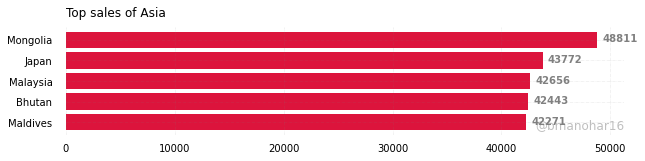

In [67]:
#showing the largest top 5 countries

fig, ax = plt.subplots(figsize=(10,2))
ax.barh(top_5.iloc[:,0], top_5.iloc[:,1], color='crimson')
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)
ax.invert_yaxis()
ax.set_title('Top sales of Asia',
             loc='left', pad=10)

for i in ax.patches:
    ax.text(i.get_width()+500, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')

fig.text(0.9, 0.15, '@bmanohar16', fontsize=12, color='grey',
         ha='right', va='bottom', alpha=0.5)

fig.savefig('Top sales of Asia', dpi=100,
            bbox_inches='tight')
plt.show()

<ipython-input-68-8ab013996e09>:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)


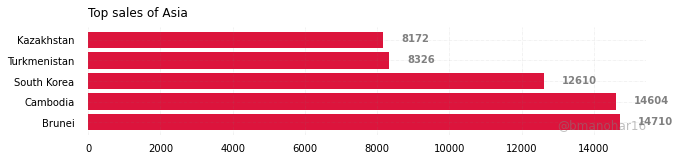

In [68]:
#showing the lowest 5 coutries

fig, ax = plt.subplots(figsize=(10,2))
ax.barh(lowest_5.iloc[:,0], lowest_5.iloc[:,1], color='crimson')
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)
ax.invert_yaxis()
ax.set_title('Top sales of Asia',
             loc='left', pad=10)

for i in ax.patches:
    ax.text(i.get_width()+500, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')

fig.text(0.9, 0.15, '@bmanohar16', fontsize=12, color='grey',
         ha='right', va='bottom', alpha=0.5)

fig.savefig('Top sales of Asia', dpi=100,
            bbox_inches='tight')
plt.show()

#**EUROPE**

In [69]:
#filtering by countries and total of unit sold per year
e = (europe.groupby(['Item Type', pd.Grouper(key='Country')])
             ['Units Sold']
             .sum().round(0)
             .unstack(fill_value=0))
def highlight_max(s):
    is_max = s == s.max()
    return ['background: red' if cell
            else '' 
            for cell in is_max]
e.style.apply(highlight_max)

Country,Albania,Andorra,Armenia,Austria,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Cyprus,Czech Republic,Denmark,Estonia,Finland,France,Georgia,Germany,Greece,Hungary,Iceland,Ireland,Italy,Kosovo,Latvia,Liechtenstein,Lithuania,Luxembourg,Macedonia,Malta,Moldova,Monaco,Montenegro,Netherlands,Norway,Poland,Portugal,Romania,Russia,San Marino,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Ukraine,United Kingdom,Vatican City
Item Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Baby Food,9013,14696,0,0,13095,4503,0,6035,0,0,1353,0,271,0,0,288,9279,7937,0,0,0,0,3747,0,0,0,16293,0,0,8600,0,0,0,6659,7008,0,0,3041,0,0,0,0,3273,13912,0,0,0,0
Beverages,8775,600,0,0,6846,4349,0,0,1785,0,1578,5497,11860,0,0,0,0,0,0,0,9919,7206,0,7497,0,0,0,4129,0,0,0,9585,0,0,6797,0,0,7415,0,4645,0,8161,0,0,4442,0,5477,7946
Cereal,0,0,9528,1443,1060,0,0,4247,0,2975,14401,0,0,0,0,0,8335,0,0,0,0,6733,0,0,13978,9113,0,0,0,0,0,0,0,0,0,3528,8985,0,0,0,0,8302,0,1370,1222,0,0,0
Clothes,8661,0,0,0,0,0,0,9285,0,0,0,0,6463,0,0,0,0,0,0,1251,799,0,0,1925,0,0,0,0,0,0,10616,13668,2354,2296,0,0,12302,0,0,0,3843,0,0,0,12670,5600,8399,2256
Cosmetics,0,0,0,0,0,9928,5372,0,0,3667,0,0,0,3596,0,0,0,0,6344,0,0,0,0,0,0,0,1937,0,8534,9615,0,0,7017,9020,0,4029,7839,4056,3226,8275,2557,0,0,9858,3183,8368,0,0
Fruits,2104,0,3872,0,0,9669,0,4884,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10787,0,9199,0,3039,0,0,441,0,0,0,6705,6863,221,0,0,0,0,0,0,0,0,0
Household,0,642,0,6878,5594,0,2321,0,0,2191,9902,0,0,9801,0,8765,6777,3151,5423,0,8006,0,0,0,6449,0,9131,0,0,0,5308,0,0,1021,2417,0,1050,0,0,0,0,6993,4455,0,0,1285,2278,0
Meat,0,4355,8896,0,0,7726,0,0,0,0,0,0,1452,0,0,0,0,0,0,2975,7936,0,0,0,0,0,1093,0,0,8510,0,0,0,0,5185,0,0,0,0,0,0,0,0,0,3585,0,0,0
Office Supplies,6892,0,0,16645,6426,1345,0,0,0,0,5668,0,8677,0,33,8180,7391,0,0,6388,7144,5263,0,0,0,7353,0,2244,0,0,0,0,7413,0,8496,19269,3636,0,0,0,0,0,4396,0,0,1431,2850,0


In [70]:
#the units (sold units per year) for (EURPOE)

europe_filtering = europe[['Order Date','Country','Item Type','Units Sold','Total Profit']]
eu = (europe_filtering.groupby(['Item Type', pd.Grouper(freq='Y', key='Order Date', closed='left')])
             ['Units Sold']
             .sum().round(0)
             .unstack(fill_value=0)).reset_index()
total_units = eu.sum(axis=0)
eu.loc['Units Sold',1:]= eu.sum(axis=0)
eu

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


Order Date,Item Type,2010-12-31 00:00:00,2011-12-31 00:00:00,2012-12-31 00:00:00,2013-12-31 00:00:00,2014-12-31 00:00:00,2015-12-31 00:00:00,2016-12-31 00:00:00,2017-12-31 00:00:00
0,Baby Food,13624.0,28286.0,0.0,13343.0,25845.0,20242.0,27663.0,0.0
1,Beverages,19608.0,12860.0,11345.0,20316.0,13747.0,9336.0,23391.0,13906.0
2,Cereal,13919.0,10449.0,16628.0,17068.0,23178.0,0.0,8149.0,5829.0
3,Clothes,15685.0,14656.0,18715.0,6815.0,0.0,28617.0,8012.0,9888.0
4,Cosmetics,12485.0,11311.0,1937.0,5372.0,28166.0,12687.0,28349.0,16114.0
5,Fruits,12708.0,29054.0,6705.0,2949.0,0.0,5105.0,1263.0,0.0
6,Household,16780.0,8640.0,11050.0,0.0,33578.0,5267.0,27351.0,7172.0
7,Meat,22167.0,13384.0,3585.0,0.0,1876.0,2975.0,0.0,7726.0
8,Office Supplies,13081.0,42234.0,7144.0,25595.0,19164.0,17284.0,3861.0,8777.0
9,Personal Care,10904.0,14842.0,13601.0,13100.0,6077.0,8875.0,15734.0,26970.0


In [71]:
#the countries's (total units sold per year) for (EUROPE)

europe_filtering = europe[['Order Date','Country','Item Type','Units Sold','Total Profit',]]
countries_eu = (europe_filtering.groupby(['Country', pd.Grouper(freq='Y', key='Order Date', closed='left')])
             ['Units Sold']
             .sum().round(0)
             .unstack(fill_value=0)).reset_index()
total_units = countries_eu.iloc[0:].sum(axis=1)
countries_eu['total units'] =total_units
top5_e = countries_eu.nlargest(5,'total units')

<ipython-input-71-ff5ea65fcb15>:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_units = countries_eu.iloc[0:].sum(axis=1)


In [72]:
#filtered the (units sold of every counrty) of europe 

r = europe_filtering.groupby(['Country'])['Units Sold'].sum().reset_index()
top_5_europe = r.nlargest(5,'Units Sold')
lowest_5_europe = r.nsmallest(5,'Units Sold')

<ipython-input-73-aa7aafbae1a8>:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)


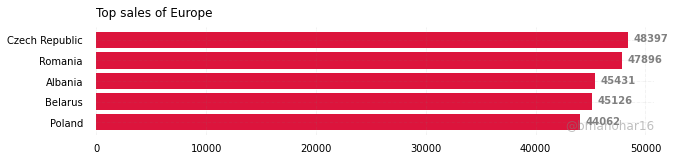

In [73]:
#showin the largest 5 countries

fig, ax = plt.subplots(figsize=(10,2))
ax.barh(top_5_europe.iloc[:,0], top_5_europe.iloc[:,1], color='crimson')
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)
ax.invert_yaxis()
ax.set_title('Top sales of Europe',
             loc='left', pad=10)

for i in ax.patches:
    ax.text(i.get_width()+500, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')

fig.text(0.9, 0.15, '@bmanohar16', fontsize=12, color='grey',
         ha='right', va='bottom', alpha=0.5)

fig.savefig('Top sales of Europe', dpi=100,
            bbox_inches='tight')
plt.show()

<ipython-input-74-0d4a244b07b6>:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)


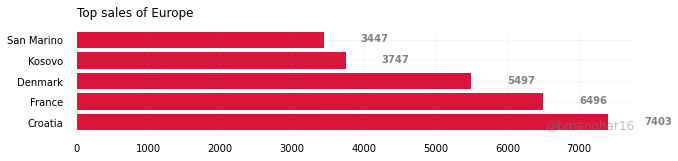

In [74]:
#showing the lowest countries

fig, ax = plt.subplots(figsize=(10,2))
ax.barh(lowest_5_europe.iloc[:,0], lowest_5_europe.iloc[:,1], color='crimson')
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)
ax.invert_yaxis()
ax.set_title('Top sales of Europe',
             loc='left', pad=10)

for i in ax.patches:
    ax.text(i.get_width()+500, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')

fig.text(0.9, 0.15, '@bmanohar16', fontsize=12, color='grey',
         ha='right', va='bottom', alpha=0.5)

fig.savefig('Top sales of Europe', dpi=100,
            bbox_inches='tight')
plt.show()

#**MIDDLE EAST**

In [75]:
#filtering by countries and total of unit sold per year
m = (middle_east.groupby(['Item Type', pd.Grouper(key='Country')])
             ['Units Sold']
             .sum().round(0)
             .unstack(fill_value=0))
def highlight_max(s):
    is_max = s == s.max()
    return ['background: red' if cell
            else '' 
            for cell in is_max]
m.style.apply(highlight_max)

Country,Afghanistan,Algeria,Azerbaijan,Bahrain,Egypt,Iran,Iraq,Israel,Jordan,Kuwait,Lebanon,Libya,Morocco,Oman,Pakistan,Qatar,Saudi Arabia,Somalia,Syria,Tunisia,Turkey,United Arab Emirates,Yemen
Item Type,,,,,,,,,,,,,,,,,,,,,,,
Baby Food,80,3175,0,404,2739,8099,0,1616,0,0,0,7354,0,15549,0,0,0,6338,0,0,368,0,5668
Beverages,0,0,0,17337,8954,0,1042,4949,0,0,6781,4550,11890,0,7117,0,0,4915,0,114,3693,0,0
Cereal,10367,0,0,0,0,0,0,0,0,0,0,1480,284,0,4019,7055,0,694,0,12524,0,0,12220
Clothes,5771,0,0,0,0,0,5864,0,9092,6436,7445,0,0,0,5534,16501,0,10721,0,0,7494,3812,0
Cosmetics,0,0,0,0,0,9133,0,0,0,0,0,8446,8053,0,0,8390,0,1881,0,0,9679,0,5940
Fruits,6433,0,0,23623,0,0,0,0,7325,0,0,0,0,2087,6569,0,0,0,0,0,0,0,0
Household,0,0,0,5990,0,2315,0,0,2445,0,9219,0,0,0,0,0,1661,0,7485,0,0,0,0
Meat,0,9191,0,0,11728,12623,0,5093,4741,7110,0,0,0,0,2554,5123,0,0,0,6135,9462,0,0
Office Supplies,0,5696,6240,5494,1765,8431,6283,0,7497,0,9306,0,8898,0,0,1004,0,0,0,0,0,0,8071


In [76]:
#the units sold units per year for (MIDDLE EAST)

middle_east_filtering = middle_east[['Order Date','Country','Item Type','Units Sold','Total Profit']]
md = (middle_east_filtering.groupby(['Item Type', pd.Grouper(freq='Y', key='Order Date', closed='left')])
             ['Units Sold']
             .sum().round(0)
             .unstack(fill_value=0)).reset_index()
total_units = md.sum(axis=0)
md.loc['Units Sold',1:]= md.sum(axis=0)
md

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


Order Date,Item Type,2010-12-31 00:00:00,2011-12-31 00:00:00,2012-12-31 00:00:00,2013-12-31 00:00:00,2014-12-31 00:00:00,2015-12-31 00:00:00,2016-12-31 00:00:00,2017-12-31 00:00:00
0,Baby Food,0.0,404.0,80.0,3175.0,20473.0,10662.0,16596.0,0.0
1,Beverages,13360.0,10354.0,9499.0,6781.0,20065.0,6899.0,0.0,4384.0
2,Cereal,6241.0,0.0,11376.0,5147.0,8535.0,10263.0,7081.0,0.0
3,Clothes,11252.0,26530.0,3812.0,0.0,1196.0,16179.0,17370.0,2331.0
4,Cosmetics,17732.0,8390.0,5940.0,0.0,19460.0,0.0,0.0,0.0
5,Fruits,2087.0,6569.0,8610.0,6433.0,0.0,9762.0,0.0,12576.0
6,Household,0.0,0.0,5990.0,0.0,4760.0,9146.0,9219.0,0.0
7,Meat,12203.0,15390.0,0.0,2554.0,8784.0,11767.0,23062.0,0.0
8,Office Supplies,1765.0,6283.0,6498.0,24874.0,8898.0,20367.0,0.0,0.0
9,Personal Care,1276.0,9681.0,8051.0,4738.0,4943.0,14802.0,2484.0,0.0


In [77]:
#the countries's total units sold per year for (MIDDLE EAST)

middle_east_filtering = middle_east[['Order Date','Country','Item Type','Units Sold','Total Profit',]]
countries_md = (middle_east_filtering.groupby(['Country', pd.Grouper(freq='Y', key='Order Date', closed='left')])
             ['Units Sold']
             .sum().round(0)
             .unstack(fill_value=0)).reset_index()
total_units = countries_md.iloc[0:].sum(axis=1)
countries_md['total units'] =total_units
top5_m = countries_md.nlargest(5,'total units')

<ipython-input-77-17ee6cc24e73>:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_units = countries_md.iloc[0:].sum(axis=1)


In [78]:
#filtered the units sold of every counrty of middle east 

r = middle_east_filtering.groupby(['Country'])['Units Sold'].sum().reset_index()
top_5_middle = r.nlargest(5,'Units Sold')
lowest_5_middle = r.nsmallest(5,'Units Sold')

<ipython-input-79-a10fbf59eeff>:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)


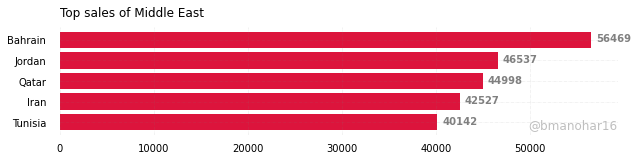

In [79]:
#showin the largest 5 countries

fig, ax = plt.subplots(figsize=(10,2))
ax.barh(top_5_middle.iloc[:,0], top_5_middle.iloc[:,1], color='crimson')
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)
ax.invert_yaxis()
ax.set_title('Top sales of Middle East',
             loc='left', pad=10)

for i in ax.patches:
    ax.text(i.get_width()+500, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')

fig.text(0.9, 0.15, '@bmanohar16', fontsize=12, color='grey',
         ha='right', va='bottom', alpha=0.5)

fig.savefig('Top sales of Middle East', dpi=100,
            bbox_inches='tight')
plt.show()

<ipython-input-80-0d4a244b07b6>:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)


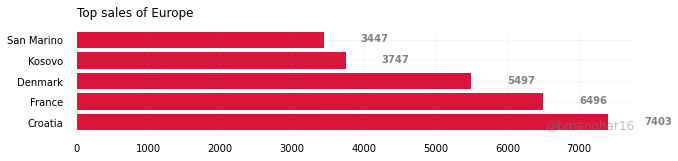

In [80]:
#showing the lowest countries

fig, ax = plt.subplots(figsize=(10,2))
ax.barh(lowest_5_europe.iloc[:,0], lowest_5_europe.iloc[:,1], color='crimson')
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)
ax.invert_yaxis()
ax.set_title('Top sales of Europe',
             loc='left', pad=10)

for i in ax.patches:
    ax.text(i.get_width()+500, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')

fig.text(0.9, 0.15, '@bmanohar16', fontsize=12, color='grey',
         ha='right', va='bottom', alpha=0.5)

fig.savefig('Top sales of Europe', dpi=100,
            bbox_inches='tight')
plt.show()

#**SAHARAN AFRICA**

In [81]:
#filtering by countries and total of unit sold per year
s = (saharan_africa.groupby(['Item Type', pd.Grouper(key='Country')])
             ['Units Sold']
             .sum().round(0)
             .unstack(fill_value=0))
def highlight_max(s):
    is_max = s == s.max()
    return ['background: red' if cell
            else '' 
            for cell in is_max]
s.style.apply(highlight_max)

Country,Angola,Benin,Botswana,Burkina Faso,Burundi,Cameroon,Cape Verde,Central African Republic,Chad,Comoros,Cote d'Ivoire,Democratic Republic of the Congo,Djibouti,Equatorial Guinea,Eritrea,Ethiopia,Gabon,Ghana,Guinea,Guinea-Bissau,Kenya,Lesotho,Liberia,Madagascar,Malawi,Mali,Mauritania,Mauritius,Mozambique,Namibia,Niger,Nigeria,Republic of the Congo,Rwanda,Sao Tome and Principe,Senegal,Seychelles,Sierra Leone,South Africa,South Sudan,Sudan,Swaziland,Tanzania,The Gambia,Togo,Uganda,Zambia,Zimbabwe
Item Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Baby Food,0,0,0,0,1698,0,0,7570,194,0,0,8049,14371,0,0,0,3791,3282,8508,0,0,8012,0,0,5006,9677,0,0,0,0,21872,951,0,7358,0,0,2279,0,5624,6240,0,2134,0,0,0,0,7526,3395
Beverages,698,0,0,0,2057,0,9794,0,0,0,0,0,0,0,0,822,0,0,0,0,897,8282,8491,0,12952,15514,8581,0,11874,3237,5093,9397,2193,0,0,8334,0,0,0,8743,0,0,0,0,0,8598,0,851
Cereal,4240,9885,2302,0,0,0,0,0,0,0,6115,0,0,7151,3994,0,0,1358,0,2950,4368,0,10779,8983,6936,8590,0,12330,0,0,7903,0,0,0,9715,4534,0,0,0,0,7103,7542,1848,0,0,5965,0,0
Clothes,0,0,9097,0,0,0,1117,0,0,0,8228,0,0,5629,0,0,0,0,0,14942,8611,0,0,9810,0,0,0,0,0,7884,5447,0,6826,0,5930,0,0,0,0,0,0,2488,0,0,3012,1816,0,0
Cosmetics,6874,0,0,3284,9036,0,4423,8309,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5118,0,0,1659,0,4713,0,0,0,0,6025,0,0,4189,2715,7344,4146,0,0,0,0,0,0,0
Fruits,0,293,0,0,0,0,9800,0,19514,0,0,15054,0,0,0,0,0,0,0,0,0,1689,5777,15130,0,4188,0,0,5622,0,0,0,8310,5639,0,1523,0,8250,4981,2880,8228,0,0,0,0,1727,3524,23367
Household,13978,1297,0,1531,0,0,0,9372,0,5738,0,0,4676,0,0,2309,5798,15375,0,0,0,0,0,0,6110,0,0,1646,7922,285,0,0,0,0,0,10269,13,0,8948,4014,4979,0,8630,0,0,0,0,0
Meat,2016,13372,0,0,0,0,0,0,17193,8052,0,0,0,1277,0,0,0,6552,18309,0,3488,0,0,0,0,6844,15213,0,0,0,6014,0,7859,6474,3275,0,0,0,7755,5319,0,924,0,0,0,0,0,10144
Office Supplies,0,760,1983,917,0,0,0,2163,15038,0,0,4732,0,7875,0,2982,0,10921,0,3221,8883,6170,316,0,0,0,0,0,4888,0,3309,0,0,0,0,0,9063,7501,0,4174,1591,13986,0,0,0,0,0,0


In [82]:
#the units sold units per year for (SAHARAN AFRICA)

saharan_africa_filtering = saharan_africa[['Order Date','Country','Item Type','Units Sold','Total Profit']]
sa = (saharan_africa_filtering.groupby(['Item Type', pd.Grouper(freq='Y', key='Order Date', closed='left')])
             ['Units Sold']
             .sum().round(0)
             .unstack(fill_value=0)).reset_index()
total_units = sa.sum(axis=0)
sa.loc['Units Sold',1:]= sa.sum(axis=0)
sa

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


Order Date,Item Type,2010-12-31 00:00:00,2011-12-31 00:00:00,2012-12-31 00:00:00,2013-12-31 00:00:00,2014-12-31 00:00:00,2015-12-31 00:00:00,2016-12-31 00:00:00,2017-12-31 00:00:00
0,Baby Food,3282.0,12532.0,20996.0,28266.0,19261.0,16386.0,19614.0,7200.0
1,Beverages,16659.0,20401.0,25201.0,25133.0,29397.0,851.0,8766.0,0.0
2,Cereal,5965.0,4240.0,28601.0,8461.0,17476.0,39711.0,23301.0,6836.0
3,Clothes,8228.0,5629.0,21856.0,8611.0,8549.0,28154.0,0.0,9810.0
4,Cosmetics,6372.0,13225.0,3284.0,11767.0,12899.0,6861.0,8309.0,5118.0
5,Fruits,28084.0,22453.0,12335.0,22244.0,11629.0,9163.0,25350.0,14238.0
6,Household,27418.0,1531.0,19471.0,35116.0,8948.0,17829.0,2577.0,0.0
7,Meat,14465.0,7487.0,38144.0,13512.0,28151.0,4006.0,16416.0,17899.0
8,Office Supplies,11415.0,7506.0,22733.0,22034.0,13992.0,18420.0,14373.0,0.0
9,Personal Care,21670.0,21065.0,9364.0,7921.0,8601.0,13416.0,15750.0,9396.0


In [83]:
#filtered the units sold of every Item type of saharan  

r = saharan_africa_filtering.groupby(['Country'])['Units Sold'].sum().reset_index()
top_5_saharan = r.nlargest(5,'Units Sold')
lowest_5_saharan = r.nsmallest(5,'Units Sold')

In [84]:
#the countries's total units sold per year for (SAHARAN AFRICA)

saharan_africa_filtering = middle_east[['Order Date','Country','Item Type','Units Sold','Total Profit',]]
countries_sa = (saharan_africa_filtering.groupby(['Country', pd.Grouper(freq='Y', key='Order Date', closed='left')])
             ['Units Sold']
             .sum().round(0)
             .unstack(fill_value=0)).reset_index()
total_units = countries_sa.iloc[0:].sum(axis=1)
countries_sa['total units'] = total_units
top5_s = countries_sa.nlargest(5,'total units')

<ipython-input-84-77739f5d3658>:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_units = countries_sa.iloc[0:].sum(axis=1)


<ipython-input-85-8b1a90e38017>:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)


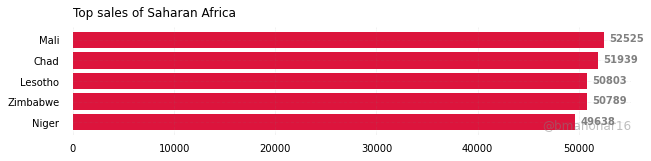

In [85]:
#showin the largest 5 countries

fig, ax = plt.subplots(figsize=(10,2))
ax.barh(top_5_saharan.iloc[:,0], top_5_saharan.iloc[:,1], color='crimson')
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)
ax.invert_yaxis()
ax.set_title('Top sales of Saharan Africa',
             loc='left', pad=10)

for i in ax.patches:
    ax.text(i.get_width()+500, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')

fig.text(0.9, 0.15, '@bmanohar16', fontsize=12, color='grey',
         ha='right', va='bottom', alpha=0.5)

fig.savefig('Top Countries sales of Saharan', dpi=100,
            bbox_inches='tight')
plt.show()

<ipython-input-86-e59b0f163d50>:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)


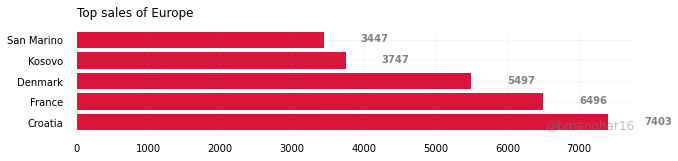

In [86]:
#showin the lowest 5 countries

fig, ax = plt.subplots(figsize=(10,2))
ax.barh(lowest_5_europe.iloc[:,0], lowest_5_europe.iloc[:,1], color='crimson')
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)
ax.invert_yaxis()
ax.set_title('Top sales of Europe',
             loc='left', pad=10)

for i in ax.patches:
    ax.text(i.get_width()+500, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')

fig.text(0.9, 0.15, '@bmanohar16', fontsize=12, color='grey',
         ha='right', va='bottom', alpha=0.5)

fig.savefig('Top sales of Europe', dpi=100,
            bbox_inches='tight')
plt.show()

In [87]:
#sum the total units sold and total profit for evry region to visulize it
asia_units = asia_filtering['Units Sold'].sum()
asia_profit = asia_filtering['Total Profit'].sum()

europe_units = europe_filtering['Units Sold'].sum()
europe_profit = europe_filtering['Total Profit'].sum()


middle_units = middle_east_filtering['Units Sold'].sum()
middle_profit = middle_east_filtering['Total Profit'].sum()

saharan_units = saharan_africa_filtering['Units Sold'].sum()
saharan_profit = saharan_africa_filtering['Total Profit'].sum()

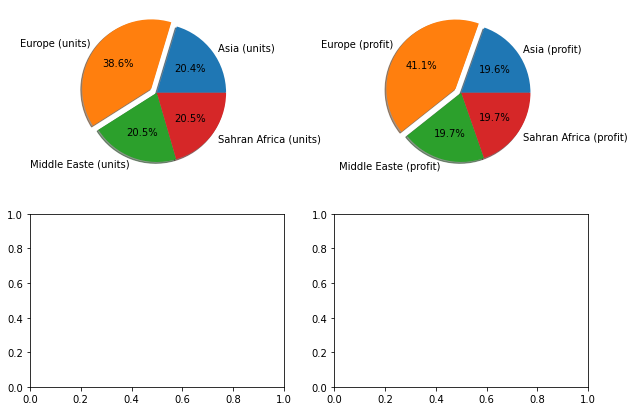

In [88]:
slices1= [asia_units, europe_units, middle_units,saharan_units]
slices2 = [asia_profit, europe_profit, middle_profit,saharan_profit]
label1 = ['Asia (units)','Europe (units)','Middle Easte (units)','Sahran Africa (units)']
label2 = ['Asia (profit)','Europe (profit)','Middle Easte (profit)','Sahran Africa (profit)']

fig, axs =plt.subplots(2,2,figsize=(10,7))
explode= [0,0.1,0,0]
axs[0,0].pie(slices1, labels=label1, explode=explode, shadow=True, autopct='%1.1f%%')  #i dont know how to set the title eerttime get an error
axs[0,1].pie(slices2, labels=label2, explode=explode, shadow=True, autopct='%1.1f%%')

plt.show()

In [89]:
#mgc = gspread.authorize(creds)
#sh = mgc.create('AFTER sales 1000 ') 
#worksheet = mgc.open('AFTER sales 1000 ').sheet1
#set_with_dataframe(worksheet, sales)